In [1]:
library(devtools)
library(ggplot2)
load_all('/ofo-share/repos-david/ofo-r')

Loading required package: usethis



ℹ Loading ofo
Warning message:
“Objects listed as exports, but not present in namespace:
• flightpath_visualization_emp”


In [2]:
map_params = list(
  shift_x=seq(from=-20, to = 20, by = 5),
  shift_y=seq(from=-20, to = 20, by = 5)
)

In [3]:
all_registration_args = big_testing_function(
 map_params = map_params,
 registration_methods = c(find_best_shift, find_best_shift, find_best_shift_hyyppa),
 eval_function = eval_res,
 registration_method_names =c("find_best_shift_optim", "find_best_shift_grid", "find_best_shift_hyyppa"),
 per_method_registration_arguments = list(list(method="optim"), list(method="grid"), list()),
 n_random_samples = 10
)

iteration: 1 / 10



6.068 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 12”
iteration: 2 / 10



5.743 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 8”
iteration: 3 / 10



5.73 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 7”
iteration: 4 / 10



5.926 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 6”
iteration: 5 / 10



5.823 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 7”
iteration: 6 / 10



5.893 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 4”
iteration: 7 / 10



5.496 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 8”
iteration: 8 / 10



6.528 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 10”
iteration: 9 / 10



6.029 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 7”
iteration: 10 / 10



5.654 sec elapsed


Warning message in (function (pred, obs, R_local = 10, k = 20, r_thresh = 1, max_iters = 200, :
“Not enough valid correspondences, setting k to 9”


In [4]:
compute_registration_metric = function(all_registration_args, reg_method, eval_function){
  # List of metrics from each run
  metric_values = list()
  # Iterate over all trials and compute the metric for each
  for (i in seq_along(all_registration_args$per_method_results$find_best_shift_optim)){
    # Get the shift predicted by the registration method
    pred_shift = all_registration_args$per_method_results[[reg_method]][[i]]
    # Get the map parameters defining the initial shift
    map_params = all_registration_args$all_map_param_configurations[i, ]
    # Compute a metric evaluating how well the predicted value matched the real one
    metric = eval_function(pred_shift, map_params)
    # Record this result
    metric_values[[i]] = metric
  }
  return(metric_values)
}

visualize_performance = function(
    all_registration_args,
    map_params,
    attributes_to_visualize,
    eval_function,
    reg_method,
    bandwidth=5
  ){
  metric_values = compute_registration_metric(
    all_registration_args = all_registration_args,
    reg_method = reg_method,
    eval_function = eval_function
  )

  for (attribute in attributes_to_visualize){
    # Create a data frame containing the attribute in question and the metric values
    df = data.frame(
      x = as.numeric(all_registration_args$all_map_param_configurations[,attribute]),
      y = as.numeric(metric_values)
    )
    s = ksmooth(df$x, df$y, kernel="normal", bandwidth = bandwidth, n.points = 100)
    s = as.data.frame(s)
    p = ggplot(s, aes(x=x, y=y)) + geom_line() + geom_point(data=df) + ggplot2::labs(x = attribute, y = "metric value")
    print(p)
  }
}

In [5]:
eval_res_dist = function(predicted_shift, map_config){
  pred_shift_vec = as.numeric(list(x=predicted_shift$shift_x, y=predicted_shift$shift_y))
  # TODO figure out one convention so we don't have to keep negating this
  pred_shift_vec = -1 * pred_shift_vec

  map_shift = as.numeric(list(x = map_config$shift_x, y = map_config$shift_y))
  cat("pred: ", pred_shift_vec, "map: ", map_shift, "\n")
  diff = pred_shift_vec - map_shift
  dist = norm(as.matrix(diff), type="2")
  return(dist)
}

eval_res_threshold = function(predicted_shift, map_config, threshold = 3){
  # Compute the distance
  dist = eval_res_dist(predicted_shift = predicted_shift, map_config = map_config)
  if (dist < threshold){
    ind = 0
  } else {
    ind = 1
  }
  return(ind)
}

pred:  -2.698286 1.488967 map:  10 10 
pred:  -0.2067905 10.05676 map:  0 10 
pred:  -0.2734323 -4.484897 map:  20 -15 
pred:  4.236751 15.99074 map:  -10 -10 
pred:  5.108113 -0.0660845 map:  5 0 
pred:  5.111231 -0.1526694 map:  15 -20 
pred:  -14.79892 -5.043258 map:  -15 -5 
pred:  -0.3839581 -0.4740884 map:  -20 20 
pred:  -19.8391 15.03437 map:  -20 15 
pred:  0.1279987 0.2394467 map:  -15 5 


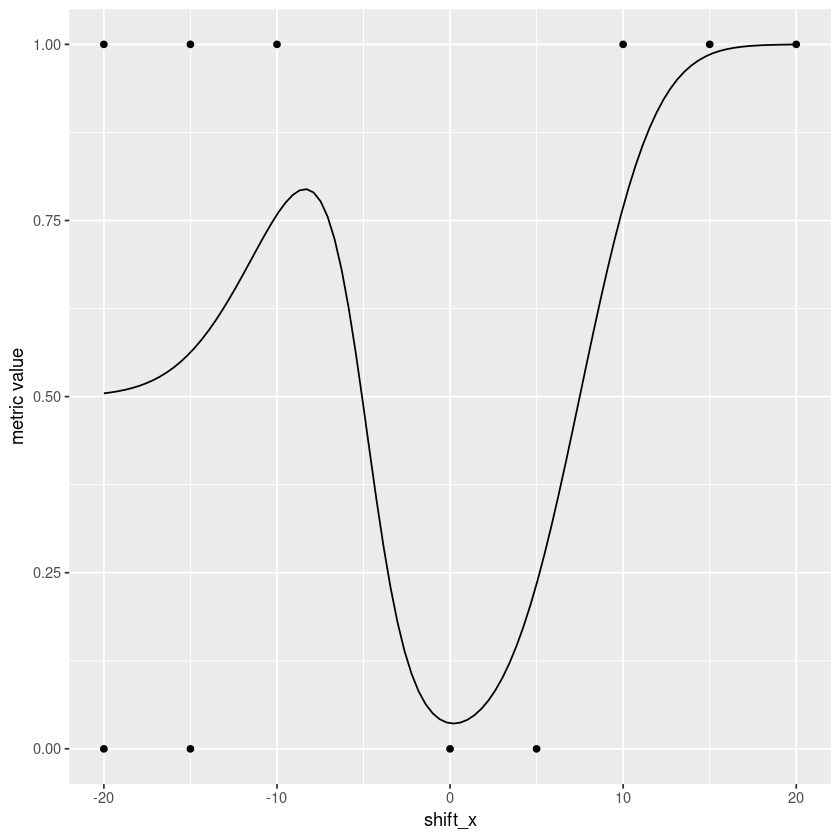

pred:  10.25 10 map:  10 10 
pred:  -0.25 10 map:  0 10 
pred:  20.25 -15 map:  20 -15 
pred:  -9.75 -10 map:  -10 -10 
pred:  5 0 map:  5 0 
pred:  14.75 -19.75 map:  15 -20 
pred:  -14.75 -5 map:  -15 -5 
pred:  -20 20 map:  -20 20 
pred:  -19.75 15 map:  -20 15 
pred:  -15 5 map:  -15 5 


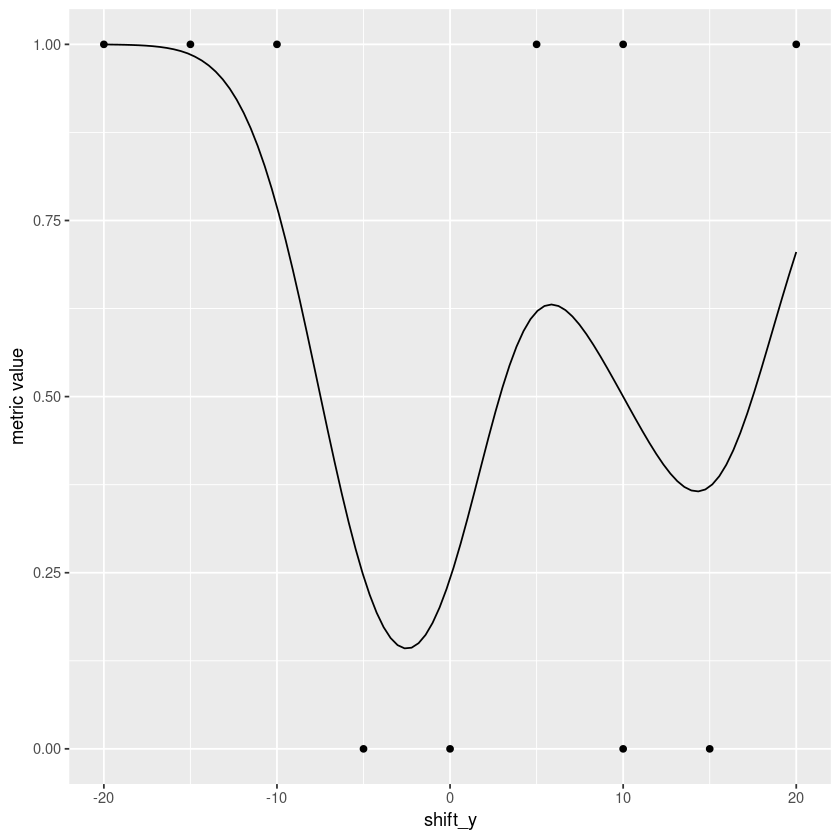

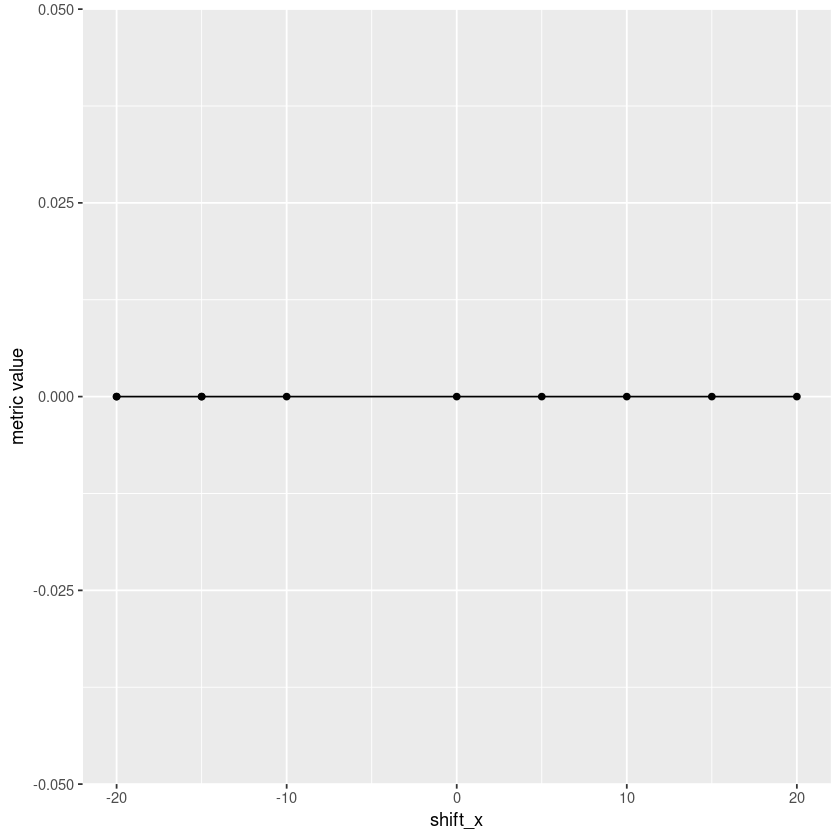

pred:  -126.1629 -8.455255 map:  10 10 
pred:  -22.90298 -50.57248 map:  0 10 
pred:  -13.42019 28.16573 map:  20 -15 
pred:  94.89313 -91.50098 map:  -10 -10 
pred:  43.67956 3.080281 map:  5 0 
pred:  -74.74335 118.5745 map:  15 -20 
pred:  -8.823803 147.5251 map:  -15 -5 
pred:  -134.1254 84.95906 map:  -20 20 
pred:  115.7888 17.80263 map:  -20 15 
pred:  -36.28644 -83.9579 map:  -15 5 


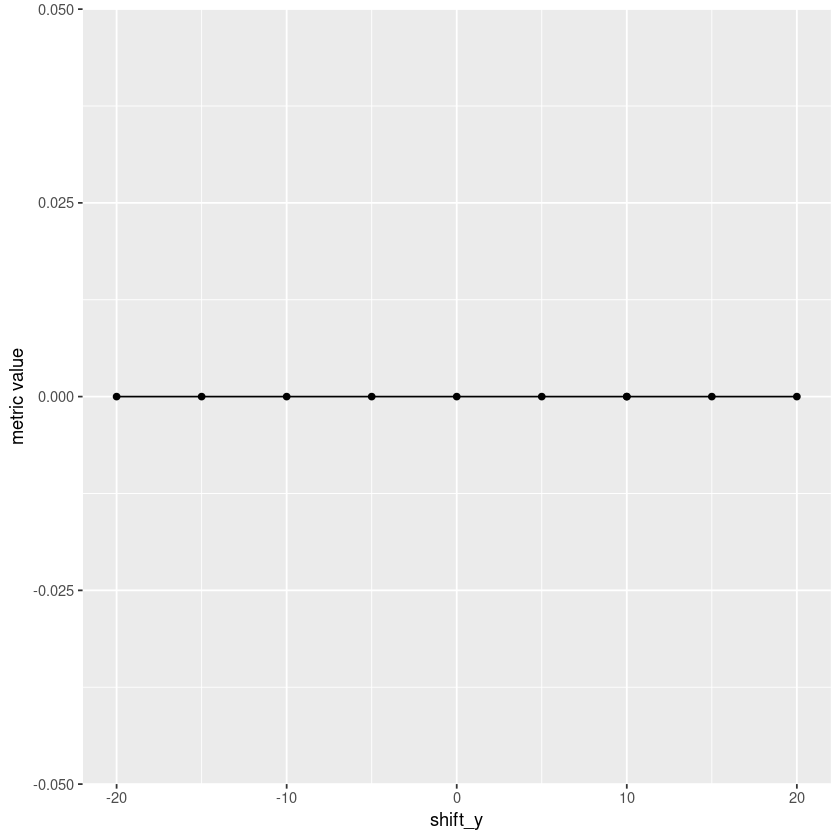

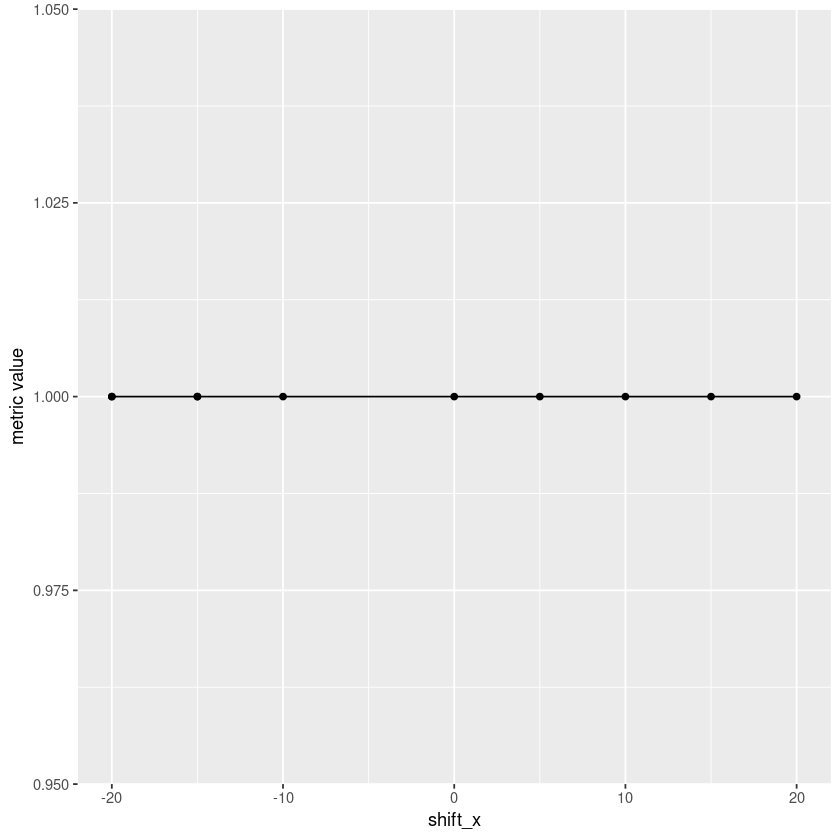

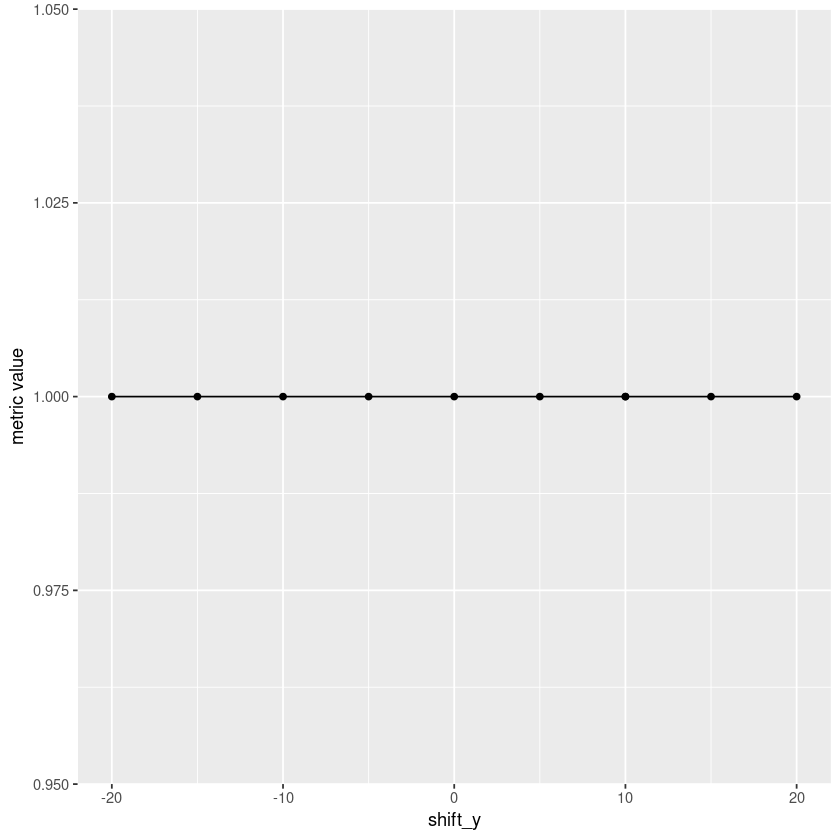

In [6]:
# Optimization
visualize_performance(
  all_registration_args = all_registration_args,
  map_params = map_params,
  attributes_to_visualize = c("shift_x", "shift_y"),
  eval_function = eval_res_threshold,
  reg_method = "find_best_shift_optim",
  bandwidth = 10
)

# Grid search
visualize_performance(
  all_registration_args = all_registration_args,
  map_params = map_params,
  attributes_to_visualize = c("shift_x", "shift_y"),
  eval_function = eval_res_threshold,
  reg_method = "find_best_shift_grid",
  bandwidth = 10
)

# Hyyppa
visualize_performance(
  all_registration_args = all_registration_args,
  map_params = map_params,
  attributes_to_visualize = c("shift_x", "shift_y"),
  eval_function = eval_res_threshold,
  reg_method = "find_best_shift_hyyppa",
  bandwidth = 10
)

In [7]:

visualize_performance(
  all_registration_args = all_registration_args,
  map_params = map_params,
  map_attribute = "shift_x",
  eval_res = eval_res_threshold,
  reg_method = "find_best_shift_hyyppa"
)

ERROR: Error in visualize_performance(all_registration_args = all_registration_args, : unused arguments (map_attribute = "shift_x", eval_res = eval_res_threshold)
